# Zomato Data Analysis Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv('Zomato_data .csv')
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [4]:
dataframe.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [5]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

dataframe['rate'] = dataframe['rate'].apply(handleRate)
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# What type of restaurant do the majority of customers order from?

/var/folders/fd/474y1p654vb25gth8zj5mcp00000gn/T/ipykernel_1642/3282505541.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe['listed_in(type)'],palette='bright')


Text(0.5, 0, 'Type of restaurant')

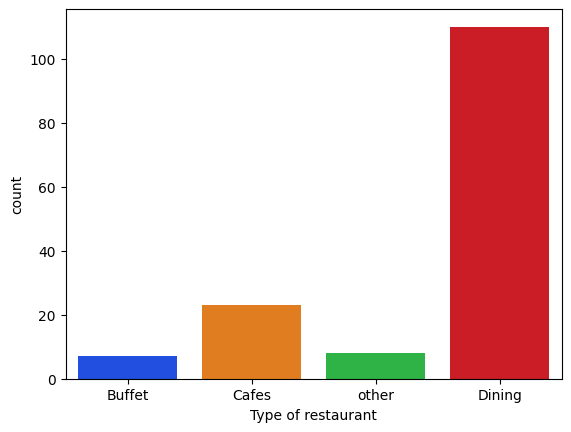

In [16]:
sns.countplot(x=dataframe['listed_in(type)'],palette='bright')
plt.xlabel("Type of restaurant")

## conslucion - The majority of the restaurants fall into the diving category

# How many votes has each type of restaurant received from customers?

Text(0, 0.5, 'Votes')

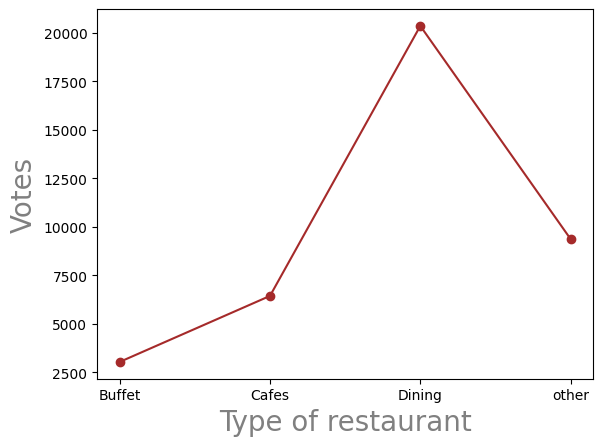

In [18]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c = 'brown', marker = 'o')
plt.xlabel('Type of restaurant', c = 'grey', size = 20)
plt.ylabel('Votes', c = 'grey', size = 20)

#  What are the ratings that the majority of restaurants have received?

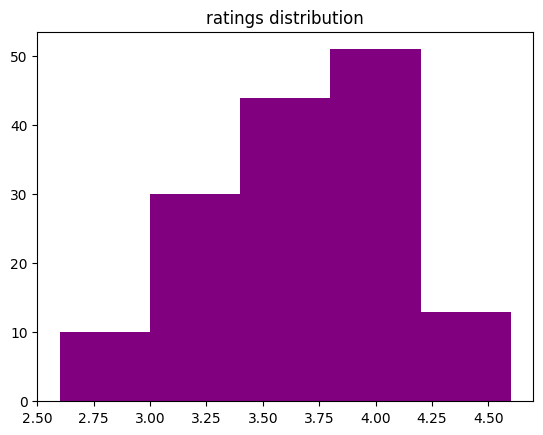

In [22]:
plt.hist(dataframe['rate'], bins = 5, color='purple')
plt.title('ratings distribution')
plt.show()

## conclusion - the majority restaurants received ratings from 3.5 to 4

# Zomato has observed that most couples order most of their food online. What is their average spending on each order?

/var/folders/fd/474y1p654vb25gth8zj5mcp00000gn/T/ipykernel_1642/2425432841.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=couple_data,palette='muted')


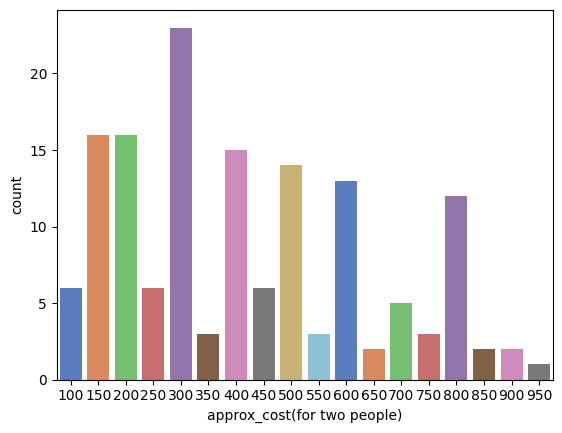

In [27]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data,palette='muted')
plt.show()

## conclusion - the majority of couples preffer restaurants with an approximate cost of 300 rupees

# Which mode (online or offline) has received the maximum rating?

/var/folders/fd/474y1p654vb25gth8zj5mcp00000gn/T/ipykernel_1642/2657864867.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe, x='online_order', y='rate', palette='dark')


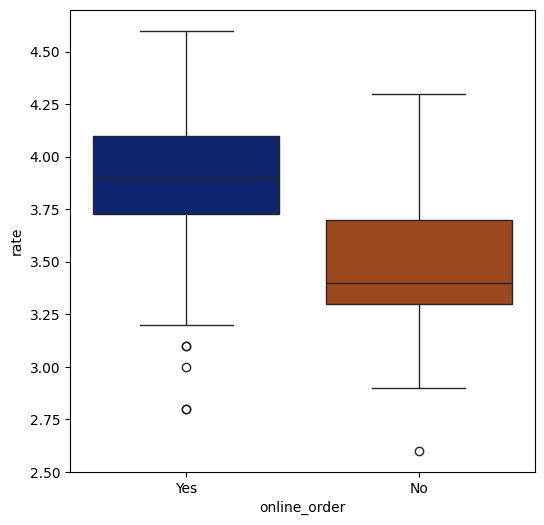

In [31]:
plt.figure(figsize=(6,6))
sns.boxplot(data=dataframe, x='online_order', y='rate', palette='dark')
plt.show()

## conclusion - offline order received lower rating in comparison to online order

#  Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?

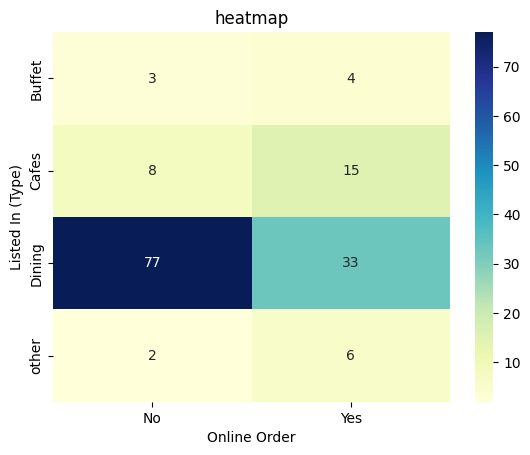

In [32]:
pivot_table = dataframe.pivot_table(index='listed_in(type)',columns = 'online_order', aggfunc = 'size', fill_value = 0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

# THANK YOU!